# Question 7 : Piece wise linear transformation

In [1]:
# importing all the neccessary libraries. dont forget to mount the drive

import numpy as np
import cv2 # to read files / images using cv2
import os #importing operating system 
import matplotlib.pyplot as plt
import matplotlib.image as img
from google.colab.patches import cv2_imshow # in new version cv2.imshow doesnt work
IMAGES_FOLDER_PATH = "/content/drive/My Drive/images" # creating a shorter name to store the path

In [8]:
bv1= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"bondvillain1.jpg"))
bv2= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"bondvillain2.jpg"))


In [25]:
#image from internet
nttd = cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"bond.jpg"))


In [9]:
# convert images to grayscale

bv1_gray = cv2.cvtColor(bv1, cv2.COLOR_BGR2GRAY)
bv2_gray = cv2.cvtColor(bv2, cv2.COLOR_BGR2GRAY) 

In [26]:
nttd_gray = cv2.cvtColor(nttd,cv2.COLOR_BGR2GRAY)

(-0.5, 2999.5, 4374.5, -0.5)

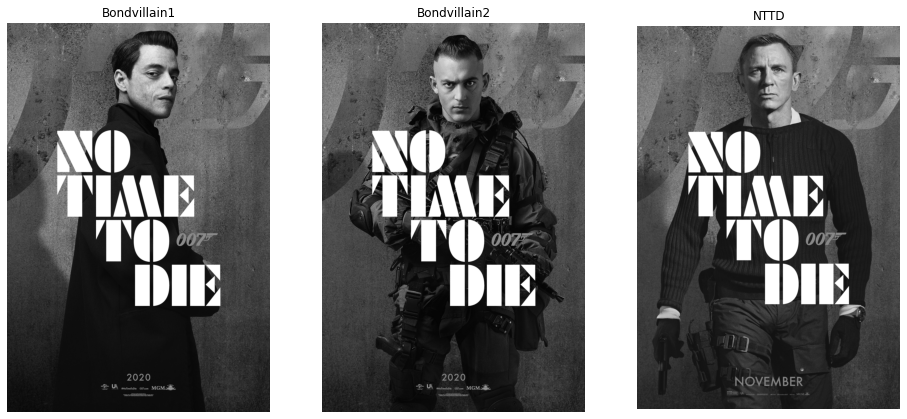

In [27]:
#DISPLAY
plt.figure(figsize=(16,16))
plt.subplot(1,3,1) #subplot(nrows,nowcolumns,index)
plt.imshow(bv1_gray, cmap='gray')
plt.title('Bondvillain1')
plt.axis('off') 
plt.subplot(1,3,2)
plt.imshow(bv2_gray, cmap='gray')
plt.title('Bondvillain2')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(nttd_gray, cmap='gray')
plt.title('NTTD')
plt.axis('off')


In [11]:
def piecewiseLinTransform(Img,K1,K2,A,B):
  
  imgflat = Img.flatten()/255
  l,b = Img.shape
  for i in range(Img.size):
    for j in range(len(K1)):
      if (imgflat[i]>=A[j] and imgflat[i]<=B[j]):
          imgflat[i] = np.int(255*(((K1[j]*imgflat[i])+K2[j])))
  #proper = np.int(imgflat)
  finalimg= imgflat.reshape(l,b)
  return finalimg
    

In [28]:
#Defining limits:

# for bondvillain 1 :
BV1_K1 = np.array([0,1.33,-0.2,0])
BV1_K2 = np.array([0,0,0.2,0])
BV1_A = np.array([0,0.3,0.6,0.8])
BV1_B= np.array([0.3,0.6,0.8,1])

# for bondvillain 2 :
BV2_K1 = np.array([0,0.2,0.4,0.6,0.8,1])
BV2_K2 = np.array([0,0,0,0,0,0])
BV2_A = np.array([0,0.2,0.4,0.6,0.8,1])
BV2_B= np.array([0.2,0.4,0.6,0.8,1,2])

# for nttd :
n_K1 = np.array([0,0.2,0.4,0.6,0.8,1])
n_K2 = np.array([0,0,0,0,0,0])
n_A = np.array([0,0.2,0.4,0.6,0.8,1])
n_B= np.array([0.2,0.4,0.6,0.8,1,2])


In [16]:
# Tranformation:
bv1_lt = piecewiseLinTransform(bv1_gray,BV1_K1,BV1_K2,BV1_A,BV1_B)
bv2_lt = piecewiseLinTransform(bv2_gray,BV2_K1,BV2_K2,BV2_A,BV2_B)

In [29]:
nttd_lt = piecewiseLinTransform(nttd_gray,n_K1,n_K2,n_A,n_B)

(-0.5, 2999.5, 4374.5, -0.5)

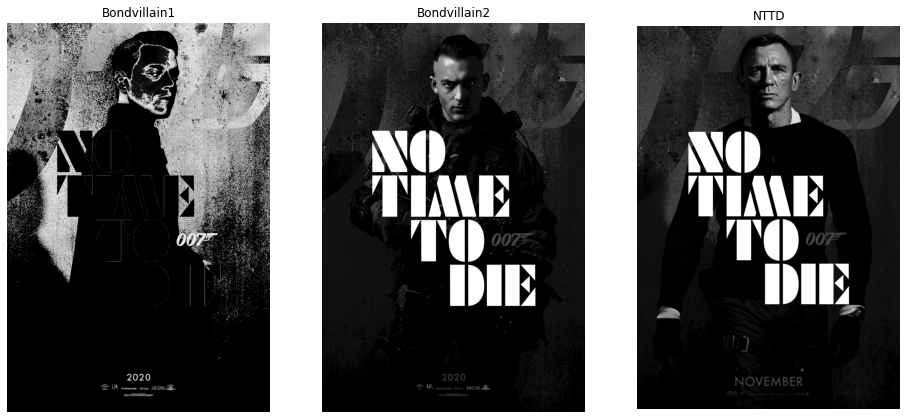

In [30]:
#DISPLAY
plt.figure(figsize=(16,16))
plt.subplot(1,3,1) #subplot(nrows,nowcolumns,index)
plt.imshow(bv1_lt, cmap='gray')
plt.title('Bondvillain1')
plt.axis('off') 
plt.subplot(1,3,2)
plt.imshow(bv2_lt, cmap='gray')
plt.title('Bondvillain2')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(nttd_lt, cmap='gray')
plt.title('NTTD')
plt.axis('off')

###Difference in the piece wise linear transformation is very evident. As can be seen in the bondvillain1 and bondvillain2. In the piecewise linear transofrmation of bond villain 1, all the higher intensities were transformed to zero, and hence the text has turned completely black, except the edges, in which hint of white/grey can be seen, as edges were not completely white.
### in Bond villain 2, the higher intesity (255) was transformed to 1(255) and hence the text preserved its color, and the edges appear to be sharpened.